Clayton Fields

Math 572 

Homework 5

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 15 13:06:44 2020

@author: claytonfields
"""

import numpy as np
import pandas as pd
from scipy.linalg import inv
from numpy import *
import sympy as sp
from sympy import Matrix
import matplotlib.pyplot as plt



def N_t(N_0,K,r,t):
    return (K*N_0)/(N_0 + (K-N_0)*np.exp(-r*t))


def dNdt(N_0,K,r,t):
    return r*N - N.T@N*(r/K)

def dNdr(N_0,K,r,t):
    n = t.size
    return ((K*N_0*t*(K-N_0)*np.exp(r*t))/(N_0*np.exp(r*t)+K-N_0)**2).reshape(n,1)

def dNdK (N_0,K,r,t):
    n = t.size
    return ((N_0**2*np.exp(r*t)*(np.exp(r*t)-1))/(K+N_0*(np.exp(r*t)-1))**2).reshape(n,1)


def LSE(N,N_0,K,r,t):
    return ((N-N_t(N_0,K,r,t))**2).sum()

def dLdr(N,N_0,K,r,t):
    term1 = ((-2*K*N_0*t*N*(K-N_0)*exp(-r*t))/(N_0+(K-N_0)*exp(-r*t))**2)
    term2 = ((2*K**2*N_0**2*t*(K-N_0)*np.exp(-r*t))/((K-N_0)*np.exp(-r*t)+N_0)**3)
    return term1.sum() + term2.sum()

def dLdK(N,N_0,K,r,t):
#    term1 = -2*N*dNdK(N_0,K,r,t).sum()
    term1 = (-2*N_0**2*N*exp(r*t)*(exp(r*t)-1))/(K+N_0*(exp(r*t)-1))**2
    term2 = (2*K*N_0**3*exp(2*r*t)*(exp(r*t)-1))/(K+N_0*(exp(r*t)-1))**3
    return term1.sum() + term2.sum()

def L_rr(N,N_0,K,r,t):
    term1 = (2*K*N_0*t**2*N*(K-N_0)*exp(r*t)*(-K+N_0*exp(r*t)+N_0))/(K+N_0*(exp(r*t)-1))**3
    term2 = (2*K**2*N_0**2*t**2*(K-N_0)*exp(2*r*t)*(2*K-N_0*exp(r*t)-2*N_0))/(K+N_0*exp(r*t)-N_0)**4
    return term1.sum() + term2.sum()

def L_kk(N,N_0,K,r,t):
    term1 = (4*N_0**2*N*exp(r*t)*(exp(r*t)-1))/(K+N_0*(exp(r*t)-1))**3
    term2 = (2*N_0**3*exp(2*r*t)*(exp(r*t)-1)*(-2*K+N_0*exp(r*t)-N_0))/(K+N_0*exp(r*t)-N_0)**4
    return term1.sum() + term2.sum()
    

def L_rk(N,N_0,K,r,t):
    term1 = (-2*N_0**2*t*N*exp(r*t)*(2*K*exp(r*t)-K-N_0*exp(r*t)+N_0))/(K+N_0*(exp(r*t)-1))**3
    term2 = (2*K*N_0**3*t*exp(2*r*t)*(3*K*exp(r*t)-2*K-2*N_0*exp(r*t)+2*N_0))/(K+N_0*exp(r*t)-N_0)**4
    return term1.sum() + term2.sum()




Gauss-Newton Method
r: 0.100, K: 1200
r: 0.110, K: 1035
r: 0.116, K: 1037
r: 0.117, K: 1035
r: 0.118, K: 1034
r: 0.118, K: 1034
r: 0.118, K: 1034
r: 0.118, K: 1034
r: 0.118, K: 1034
r: 0.118, K: 1034
r: 0.118, K: 1034
r: 0.118, K: 1034


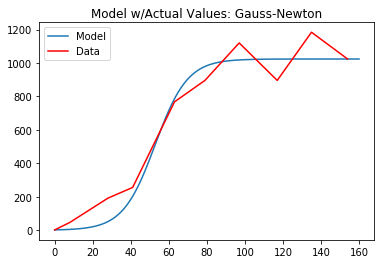

In [2]:
data = pd.read_csv('flourbeetles.dat', sep=" ")
t = data['days'].to_numpy()
N = data['beetles'].to_numpy()


N_0=N[0]
K = 1200
r = .1
theta = [r,K]


A = np.hstack((dNdr(N_0,K,r,t),dNdK(N_0,K,r,t)))
x = N-N_t(N_0,K,r,t)

maxiter = 12

#Implement Gauss Newton Method
print('Gauss-Newton Method')
for i in range(maxiter):
    print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
    theta = theta+inv(A.T@A)@(A.T@x)
    A = np.hstack((dNdr(N_0,theta[1],theta[0],t),dNdK(N_0,theta[1],theta[0],t)))
    x = N-N_t(N_0,theta[1],theta[0],t)
    
t = data['days'].to_numpy()
N = data['beetles'].to_numpy()


N_0=N[0]
K = 1200
r = .3
theta = [r,K]
maxiter = 20

grad = np.array([dLdr(N,N_0,K,r,t),dLdK(N,N_0,K,r,t)])
H = np.array([[L_rr(N,N_0,K,r,t),L_rk(N,N_0,K,r,t)],[L_rk(N,N_0,K,r,t),L_kk(N,N_0,K,r,t)]])


domain = np.linspace(0,160,300)
plt.plot(domain,N_t(N_0,1024,.118,domain))    
plt.plot(t,N,'r-')
plt.title('Model w/Actual Values: Gauss-Newton')
plt.legend(('Model','Data'))




Newton-Raphson Method
r: 0.300, K: 1200
r: 0.303, K: 805
r: 0.347, K: 790
r: 0.385, K: 792
r: 0.422, K: 792
r: 0.469, K: 792
r: 0.261, K: 794
r: 0.346, K: 767
r: 0.388, K: 792
r: 0.425, K: 792
r: 0.475, K: 792
r: 0.345, K: 793
r: 0.383, K: 792
r: 0.420, K: 792
r: 0.466, K: 792
r: 0.139, K: 794
r: 0.122, K: 1008
r: 0.117, K: 1034
r: 0.118, K: 1034
r: 0.118, K: 1034
Gauss-Newton Method
r: 0.190, K: 800
r: 0.191, K: 824
r: 0.192, K: 823
r: 0.192, K: 822
r: 0.192, K: 822
r: 0.192, K: 821
r: 0.192, K: 821
r: 0.192, K: 821
r: 0.192, K: 821
r: 0.192, K: 821
r: 0.193, K: 821
r: 0.193, K: 821

Newton-Raphson Method
r: 0.100, K: 800
r: 0.129, K: 951
r: 0.154, K: 933
r: 0.172, K: 869
r: 0.185, K: 835
r: 0.191, K: 823
r: 0.193, K: 820
r: 0.193, K: 820
r: 0.193, K: 820
r: 0.193, K: 820
r: 0.193, K: 820
r: 0.193, K: 820


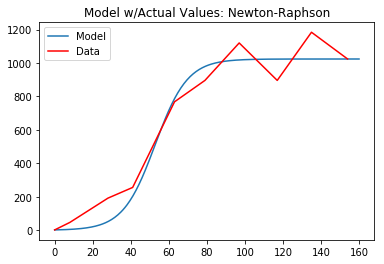

In [3]:
#Implement Newton Raphson
print()
print('Newton-Raphson Method')
for i in range(maxiter):
    print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
#    print('grad: ', grad)
#    print('hessian: ', H)
    theta = theta-inv(H)@grad
    grad = np.array([dLdr(N,N_0,theta[1],theta[0],t),dLdK(N,N_0,theta[1],theta[0],t)])
    H = np.array([[L_rr(N,N_0,theta[1],theta[0],t),L_rk(N,N_0,theta[1],theta[0],t)],\
                   [L_rk(N,N_0,theta[1],theta[0],t),L_kk(N,N_0,theta[1],theta[0],t)]])

plt.figure()
domain = np.linspace(0,160,300)
plt.plot(domain,N_t(N_0,1024,.118,domain))    
plt.plot(t,N,'r-')
plt.title('Model w/Actual Values: Newton-Raphson')
plt.legend(('Model','Data'))
    
 
##Part C
def Logdldk(N,N0,K,r,t):
    return (N0*(exp(r*t)-1))/ (K*(K+N0*(exp(r*t)-1)))

def Logdldr(N,N0,K,r,t):
    return (t*(K-N0))/(K+N0*(exp(r*t)-1))

def Logd2dk2(N,N0,K,r,t):
    return 1/(K+N0*(exp(r*t)-1))**2 - 1/K**2

def Logd2r2(N,N0,K,r,t):
    return -(N0*t**2*(K-N0)*exp(r*t))/(K+N0*(exp(r*t)-1))**2
    
def Logd2drdk(N,N0,K,r,t):
    return (N0*t*exp(r*t))/(K+N0*exp(r*t)-N0)**2
    
def dQdk(N,N0,K,r,t):
    return 2*(((N0*(exp(r*t)-1)*(log(N)-log(N_t(N_0,K,r,t))))/(K*(K+N0*exp(r*t)-N0))).sum())

def dQdr(N,N0,K,r,t):
    return ((2*t*(K-N0)*(log(N)-log((K*N0*exp(r*t))/(K+N0*(exp(r*t)-1)))))/(K+N0*(exp(r*t)-1))).sum()

def d2Qdr2(N,N0,K,r,t):
    return 2*((log(N)-log(N_t(N0,K,r,t)))*Logd2r2(N,N0,K,r,t)-Logdldr(N,N0,K,r,t)**2).sum()

def d2Qdk2(N,N0,K,r,t):
    return 2*((log(N)-log(N_t(N0,K,r,t)))*Logd2dk2(N,N0,K,r,t)-Logdldk(N,N0,K,r,t)**2).sum()

def d2Qdrdk(N,N0,K,r,t):
    return 2*((log(N)-log(N_t(N0,K,r,t)))*Logd2drdk(N,N0,K,r,t)-Logdldr(N,N0,K,r,t)*Logdldk(N,N0,K,r,t)).sum()


#N_0=N[0]
K = 800
r = .19
theta = [r,K]


A = np.hstack((Logdldr(N,N_0,K,r,t).reshape(10,1),Logdldk(N,N_0,K,r,t).reshape(10,1)))
x = log(N)-log(N_t(N_0,K,r,t))

maxiter = 12

#Implement Gauss Newton Method

print('Gauss-Newton Method')
for i in range(maxiter):
    print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
    theta = theta+inv(A.T@A)@(A.T@x)
    A = np.hstack((Logdldr(N,N_0,theta[1],theta[0],t).reshape(10,1), Logdldk(N,N_0,theta[1],theta[0],t).reshape(10,1)))
    x = log(N)-log(N_t(N_0,theta[1],theta[0],t))

#Implement Newton Raphson
N0=2
K = 800
r = .1
theta = [r,K]
maxiter = 12

grad = np.array([dQdr(N,N0,K,r,t),dQdk(N,N0,K,r,t)])
H = np.array([[d2Qdr2(N,N0,K,r,t),d2Qdrdk(N,N0,K,r,t)],
               [d2Qdrdk(N,N0,K,r,t),d2Qdk2(N,N0,K,r,t)]])

    
    
print()
print('Newton-Raphson Method')
for i in range(maxiter):
    print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
#    print('grad: ', grad)
#    print('hessian: ', H)
    theta = theta-inv(H)@grad
    grad = np.array([dQdr(N,N0,theta[1],theta[0],t),dQdk(N,N0,theta[1],theta[0],t)])
    H = np.array([[d2Qdr2(N,N0,theta[1],theta[0],t),d2Qdrdk(N,N0,theta[1],theta[0],t)],
                   [d2Qdrdk(N,N0,theta[1],theta[0],t),d2Qdk2(N,N0,theta[1],theta[0],t)]])   
      


In [4]:
"""
Problem 02: From example 4.2
"""
def ENcc(nc,pc,pi,pt):
    return (nc*pc**2)/(pc**2+2*pc*pi+2*pc*pt)

def ENci(nc,pc,pi,pt):
    return (2*nc*pc*pi)/(pc**2+2*pc*pi+2*pc*pt)

def ENct(nc,pc,pi,pt):
    return (2*nc*pc*pt)/(pc**2+2*pc*pi+2*pc*pt)

def ENii(ni,pi,pt):
    return (ni*pi**2)/(pi**2+2*pi*pt)

def ENit(ni,pi,pt):
    return (2*ni*pi*pt)/(pi**2+2*pi*pt)

def p_c(ncc,nci,nct):
    return (2*ncc+nci+nct)/(2*622)

def p_i(nii,nit,nci):
    return (2*nii+nit+nci)/(2*622)

def p_t(nit,nct,ntt):
    return (2*ntt+nct+nit)/(2*622)

nc = 85; ni = 196; nt = ntt = 341
n = nc + ni +nt
pc = pi = pt = .333333

k=0
pcl = [pc]
pil = [pi]
ptl = [pt]

print()
for i in range(10):
    #E step
    ncc = ENcc(nc,pc,pi,pt)
    nci = ENci(nc,pc,pi,pt)
    nct = ENct(nc,pc,pi,pt)
    nii = ENii(ni,pi,pt)
    nit = ENit(ni,pi,pt)
    #Mstep
    pc = p_c(ncc,nci,nct)
    pi = p_i(nii,nit,nci)
    pt = p_t(nit,nct,ntt)
    
    pcl.append(pc)
    pil.append(pi)
    ptl.append(pt)
    print(k)
    print(pc)
    print(pi)
    print(pt)
#    print('Dc: ', dc)
#    print('Di: ', di)
    print()
    k+=1

Dcl = []
Dil = []
for i in range(9):
    Dcl.append((pcl[i+1]-pcl[-1])/(pcl[i]-pcl[-1]))
    Dil.append((pil[i+1]-pil[-1])/(pil[i]-pil[-1]))



    


0
0.0819935691318328
0.237406216505895
0.6806002143622722

1
0.07124895222129086
0.19786961442510004
0.7308814333536091

2
0.07085204112290056
0.1903603759883005
0.738787582888799

3
0.07083746372289564
0.18902270882449176
0.7401398274526126

4
0.07083692845123
0.18878687218804827
0.7403761993607217

5
0.0708369087965926
0.18874537476321254
0.7404177164401948

6
0.07083690807489428
0.18873807578044915
0.7404250161446565

7
0.07083690804839426
0.18873679206200075
0.740426299889605

8
0.07083690804742121
0.18873656628981744
0.7404265256627613

9
0.07083690804738547
0.1887365265825768
0.7404265653700378

